# Домашнее задание "Теория вероятности. Непрерывные Случайные Величины".
## Уровень 0:
Задание 1:
Получить интуицию, на что влияют параметры распределений. Построить по 5 функций плотностей с разными параметрами для каждого распределения: нормальное, экспоненциальное, Стьюдента на одном графике.

## Уровень 1:
Задание 2
Непрерывная случайная величина задана плотностью распределения:$$ f(\xi) = C, \xi \in [0;5];f(\xi) = 0, \xi \notin [0;5]$$Найдите C, математическое ожидание $\xi$ а также вероятность попадания в отрезок $[3.5;7]$, т.е. P(3.5 < $\xi$ < 7).

Задание 3
Известно, что светофор горит 54 секунды красным, 4 секунды жёлтым и 28 секунд зелёным. Посчитайте, какое количество информации несёт сообщение о цвете светофора в текущий момент. А что будет в случае 28, 28 и 28 секунд для каждого цвета?

# Задание 1
### Нормальное распределение

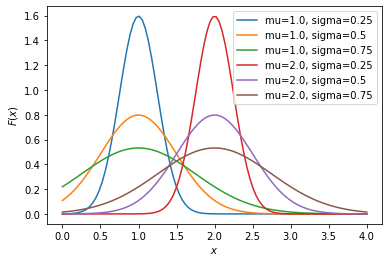

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

mu = (1.0,2.0)
sigma = (0.25,0.5,0.75)

for m in mu:
    for s in sigma:
        norm_rv = sts.norm(loc = m, scale = s) #зададим нормально распределенную случайную величину
        norm_rv.rvs(size = 10) #сгенерируем 10 значений
        norm_rv.pdf(3) #возвращает вероятность того, что случайная переменная принимает значение, меньшее или равное k
        x = np.linspace(0,4,100)
        pdf = norm_rv.pdf(x) #
        plt.plot(x,pdf, label=f'mu={m}, sigma={s}')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend()

mu влияет на сдвиг относительно горизонтальной оси (влево-вправо), sigma - на сжатие колокола (чем sigma больше, тем колокол шире)

### Экспоненциальное распределение

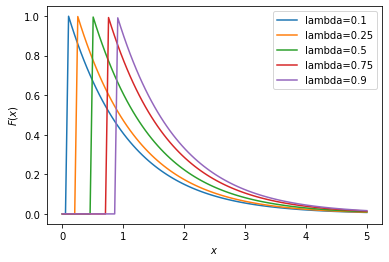

In [13]:
lam = (0.1, 0.25, 0.5, 0.75, 0.9)

for l in lam:
    expon_rv = sts.expon(l) 
    expon_rv.rvs(10) #сгенерируем 10 значений
    x = np.linspace(0,5,100)
    pdf = expon_rv.pdf(x) #график функции плотности вероятности
    plt.plot(x, pdf, label=f'lambda={l}')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend()

lambda - единственный параметр в экспоненциальном распределении, он как определяет сдвиг относительно горизонтальной оси (влево-вправо), так и определяет приближенность кривой к оси х (чем больше значение lambda тем дальше от оси х) 

### Распределение Стьюдента

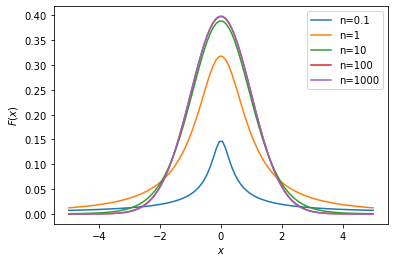

In [17]:
n = (0.1,1,10,100,1000)

for nn in n:
    t_rv = sts.t(nn) 
    t_rv.rvs(10) #сгенерируем 10 значений
    x = np.linspace(-5,5,100)
    pdf = t_rv.pdf(x) #график функции плотности вероятности
    plt.plot(x, pdf, label=f'n={nn}')
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend()

Чем больше n - тем сильнее t-распределение стремится к нормальному

# Задание 2
### Непрерывная случайная величина задана плотностью распределения: 𝑓(𝜉)=𝐶,𝜉∈[0;5];𝑓(𝜉)=0,𝜉∉[0;5] Найдите C, математическое ожидание  𝜉  а также вероятность попадания в отрезок  [3.5;7] , т.е. P(3.5 <  𝜉  < 7).

In [32]:
a = 0
b = 5
С = 1/(b-a) #Находим С
С

0.2

In [35]:
import scipy.integrate as integrate
import scipy.special as special
e = integrate.quad(lambda x: С*x, a, b) #Матожидание
e[0]

2.5

In [34]:
x1 = 3.5
x2 = 7
p = С*(x2-x1)
p

0.7000000000000001

# Задание 3 
### Известно, что светофор горит 54 секунды красным, 4 секунды жёлтым и 28 секунд зелёным. Посчитайте, какое количество информации несёт сообщение о цвете светофора в текущий момент. А что будет в случае 28, 28 и 28 секунд для каждого цвета?

In [38]:
red = 54
yellow = 4
green = 28
p_red = red / (red + yellow + green)
p_yellow = yellow / (red + yellow + green)
p_green = green / (red + yellow + green)

In [49]:
import math
I1 = -(p_red*math.log(p_red,2) + p_yellow*math.log(p_yellow,2) + p_green*math.log(p_green,2))#формула Шеннона
I1


1.584962500721156

In [58]:
# В случае равновероятных событий формула Шеннона упрощается до формулы Хартли
p_all_colours = 28/(28+28+28)
print(p_all_colours)
I2 = -(math.log(p_all_colours,2))
I2

0.3333333333333333


1.5849625007211563

In [57]:
#Равновероятные события по Шэннона
red = 28
yellow = 28
green = 28
p_red = red / (red + yellow + green)
p_yellow = yellow / (red + yellow + green)
p_green = green / (red + yellow + green)
I1 = -(p_red*math.log(p_red,2) + p_yellow*math.log(p_yellow,2) + p_green*math.log(p_green,2))#формула Шеннона
I1

1.584962500721156